**PP22/C624**

**Scope:** Crime Population

**Topic:** Gun Violence

**Project Description:**
The rise in lack of profitable employment world-wide among many other things has catalyzed the bane of gun violence amidst young people. A comprehensive data that has been compiled from 2013- 2018 guarantees some insight into this problem.

<hr>

Importing libraries

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import calendar
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
from PIL import Image
import folium 
from folium import plugins 

%autosave 1

Autosaving every 1 seconds


Importing the dataset

In [93]:
data_1 = pd.read_csv("data_1.csv")
data_2 = pd.read_csv("data_2.csv")
df = pd.concat([data_1, data_2])
df

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89672,1083142,2018-03-31,Louisiana,Rayne,North Riceland Road and Highway 90,0,0,http://www.gunviolencearchive.org/incident/108...,http://www.klfy.com/news/local/rayne-woman-cha...,False,...,0::25,0::Adult 18+,0::Female,0::Jhkeya Tezeno,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,http://www.klfy.com/news/local/rayne-woman-cha...,NaN,NaN
89673,1083139,2018-03-31,Louisiana,Natchitoches,247 Keyser Ave,1,0,http://www.gunviolencearchive.org/incident/108...,http://www.ksla.com/story/37854648/man-wanted-...,False,...,1::21,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Jamal Haskett||1::Jaquarious Tyjuan Ardison,NaN,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,http://www.ksla.com/story/37854648/man-wanted-...,23.0,31.0
89674,1083151,2018-03-31,Louisiana,Gretna,1300 block of Cook Street,0,1,http://www.gunviolencearchive.org/incident/108...,http://www.nola.com/crime/index.ssf/2018/04/sh...,False,...,0::21,0::Adult 18+,0::Male,NaN,NaN,0::Injured,0::Victim,http://www.nola.com/crime/index.ssf/2018/04/sh...,85.0,7.0
89675,1082514,2018-03-31,Texas,Houston,12630 Ashford Point Dr,1,0,http://www.gunviolencearchive.org/incident/108...,https://www.chron.

I have found that there is a missing row in the data 

to fix this row in the dataset

According to the author of this dataset, one particular incident is missing from the dataset

I have manually added this incident [read here](https://www.kaggle.com/jameslko/gun-violence-data/discussion/55307)

In [94]:
missing_row = [
    'sban_1', '2017-10-01', 'Nevada', 'Las Vegas', 'Mandalay Bay 3950 Blvd S',
    59, 489, 'https://en.wikipedia.org/wiki/2017_Las_Vegas_shooting',
    'https://en.wikipedia.org/wiki/2017_Las_Vegas_shooting', '-', '-', '-',
    '-', '-', '36.095', 'Hotel', '-115.171667', 47,
    'Route 91 Harvest Festiva; concert, open fire from 32nd floor. 47 guns seized; TOTAL:59 kill, 489 inj, number shot TBD,girlfriend Marilou Danley POI',
    '-', '-', '-', '-', '-', '-', '-', '-', '-', '-'
]
df.loc[len(df)] = missing_row

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239678 entries, 0 to 239677
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   incident_id                  239678 non-null  object 
 1   date                         239678 non-null  object 
 2   state                        239678 non-null  object 
 3   city_or_county               239678 non-null  object 
 4   address                      223181 non-null  object 
 5   n_killed                     239678 non-null  int64  
 6   n_injured                    239678 non-null  int64  
 7   incident_url                 239678 non-null  object 
 8   source_url                   239210 non-null  object 
 9   incident_url_fields_missing  239678 non-null  object 
 10  congressional_district       227734 non-null  object 
 11  gun_stolen                   140180 non-null  object 
 12  gun_type                     140227 non-null  object 
 13 

Here we found that the dates are not in the type of pandas datetype

In [96]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month.apply(lambda x: calendar.month_abbr[x])
df['monthday'] = df['date'].dt.day
df['weekday'] = df['date'].dt.day_name()
df['violence'] = df['n_killed'] + df['n_injured']

I have combined number of people killed and number of injuries happend so that we will get the total number of count as a violence

now let's take a look at our data

In [97]:
df

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_status,participant_type,sources,state_house_district,state_senate_district,year,month,monthday,weekday,violence
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN,2013,Jan,1,Tuesday,4
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62,35,2013,Jan,1,Tuesday,4
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56,13,2013,Jan,1,Tuesday,4
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40,28,2013,Jan,5,Saturday,4
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62,27,2013,Jan,7,Monday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89673,1083139,2018-03-31,Louisiana,Natchitoches,247 Keyser Ave,1,0,http://www.gunviolencearchive.org/incident/108...,http://www.ksla.com/story/37854648/man-wanted-...,False,...,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,http://www.ksla.com/story/37854648/man-wanted-...,23,31,2018,Mar,31,Saturday,1
89674,1083151,2018-03-31,Louisiana,Gretna,1300 block of Cook Street,0,1,http://www.gunviolencearchive.org/incident/108...,http://www.nola.com/crime/index.ssf/2018/04/sh...,False,...,0::Injured,0::Victim,http://www.nola.com/crime/index.ssf/2018/04/sh...,85,7,2018,Mar,31,Saturday,1
89675,1082514,2018-03-31,Texas,Houston,12630 Ashford Point Dr,1,0,http://www.gunviolencearchive.org/incident/108...,https://www.chron.com/news/houston-texas/houst...,False,...,0::Killed,0::Victim,http://www.khou.com/article/news/hpd-investiga...,149,17,2018,Mar,31,Saturday,1
89676,1081940,2018-03-31,Maine,Norridgewock,434 Skowhegan Rd,2,0,http://www.gunviolencearchive.org/incident/108...,https://www.centralmaine.com/2018/03/31/police...,False,...,0::Killed||1::Killed,0::Victim||1::Subject-Suspect,https://www.centralmaine.com/2018/03/31/police...,111,3,2018,Mar,31,Saturday,2


we have 30+ columns

In [98]:
df.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district', 'year', 'month', 'monthday', 'weekday',
       'violence'],
      dtype='object')

**what does the rows represent ?**

In [99]:
df.iloc[1]

incident_id                                                               460726
date                                                         2013-01-01 00:00:00
state                                                                 California
city_or_county                                                         Hawthorne
address                                             13500 block of Cerise Avenue
n_killed                                                                       1
n_injured                                                                      3
incident_url                   http://www.gunviolencearchive.org/incident/460726
source_url                     http://www.dailybulletin.com/article/zz/201301...
incident_url_fields_missing                                                False
congressional_district                                                        43
gun_stolen                                                                   NaN
gun_type                    

**Analyzing the null information from the data**

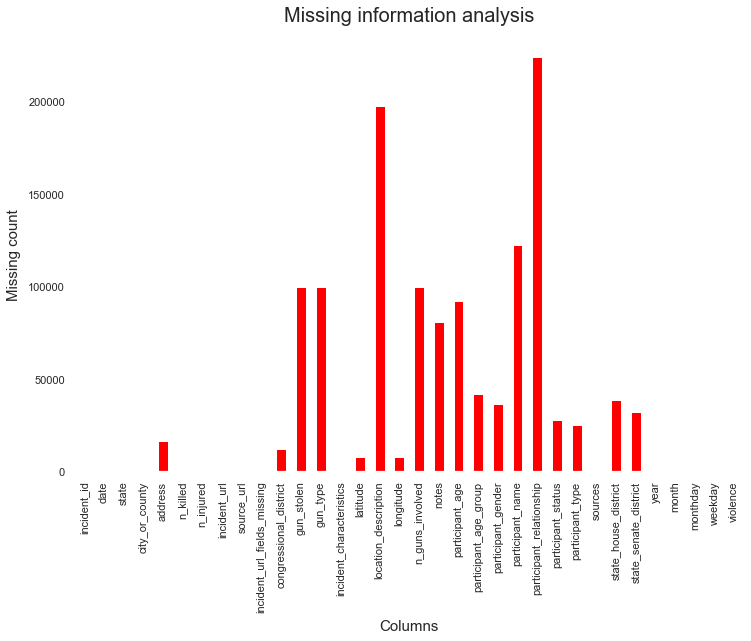

In [100]:
ax = plt.axes()
ax.set_facecolor("white")
df.isna().sum().plot(kind='bar',color='red');
plt.xlabel('Columns', labelpad=7, loc='center', fontsize=15)
plt.ylabel('Missing count', labelpad=7, fontsize=15)
plt.title('Missing information analysis',pad=15, fontsize=20);
plt.grid(False)

we can see that we have quite a large number of missing data 

In [101]:
df.isna().sum()

incident_id                         0
date                                0
state                               0
city_or_county                      0
address                         16497
n_killed                            0
n_injured                           0
incident_url                        0
source_url                        468
incident_url_fields_missing         0
congressional_district          11944
gun_stolen                      99498
gun_type                        99451
incident_characteristics          326
latitude                         7923
location_description           197588
longitude                        7923
n_guns_involved                 99451
notes                           81017
participant_age                 92298
participant_age_group           42119
participant_gender              36362
participant_name               122253
participant_relationship       223903
participant_status              27626
participant_type                24863
sources     

**Number of gun violence per year**

Now,let's start analyzing the data with the year,take a look at ``violence happening per year,month,weekday``

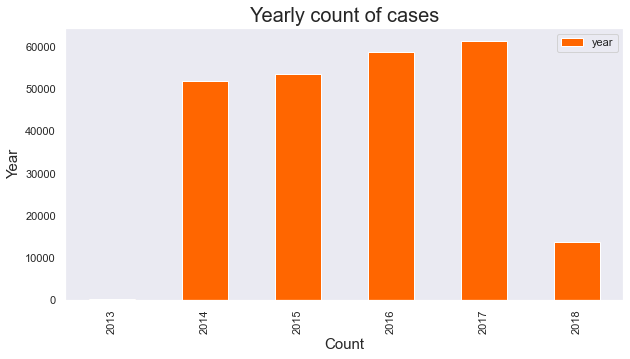

In [102]:
df.groupby('year').agg({'year':'count'}).plot(kind='bar',figsize=(10,5),color='#ff6600');
plt.grid(False)
plt.title('Yearly count of cases',fontsize=20)
plt.xlabel('Count',fontsize=15)
plt.ylabel('Year',fontsize=15);

we can see that the violence is increasing with the year.the data available for year 2018 is only for 3 months so we can ignore the data 

### **Incidents per month**

**Incidents per month for every year**

In [103]:
yearly = df.groupby(['year', 'month']).aggregate({
    'month': 'count',
}).rename(columns={
    'month': 'month_count'
}).reset_index()

year_2013 = yearly[yearly['year'] == 2013]
year_2014 = yearly[yearly['year'] == 2014]
year_2015 = yearly[yearly['year'] == 2015]
year_2016 = yearly[yearly['year'] == 2016]
year_2017 = yearly[yearly['year'] == 2017]
year_2018 = yearly[yearly['year'] == 2018]

year_2013 = year_2013[['month', 'month_count'
                       ]].set_index('month').sort_values('month_count')
fig = px.bar(year_2013.reset_index(),
             y='month',
             x='month_count',
             text=round(year_2013['month_count'], 2),
             color='month_count',
             title='year 2013')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

year_2014 = year_2014[['month', 'month_count'
                       ]].set_index('month').sort_values('month_count')
fig = px.bar(year_2014.reset_index(),
             y='month',
             x='month_count',
             text=round(year_2014['month_count'], 2),
             color='month_count',
             title='year 2014')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

year_2015 = year_2015[['month', 'month_count'
                       ]].set_index('month').sort_values('month_count')
fig = px.bar(year_2015.reset_index(),
             y='month',
             x='month_count',
             text=round(year_2015['month_count'], 2),
             color='month_count',
             title='year 2015')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

year_2016 = year_2016[['month', 'month_count'
                       ]].set_index('month').sort_values('month_count')
fig = px.bar(year_2016.reset_index(),
             y='month',
             x='month_count',
             text=round(year_2016['month_count'], 2),
             color='month_count',
             title='year 2016')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

year_2017 = year_2017[['month', 'month_count'
                       ]].set_index('month').sort_values('month_count')
fig = px.bar(year_2017.reset_index(),
             y='month',
             x='month_count',
             text=round(year_2017['month_count'], 2),
             color='month_count',
             title='year 2017')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

year_2018 = year_2018[['month', 'month_count'
                       ]].set_index('month').sort_values('month_count')
fig = px.bar(year_2018.reset_index(),
             y='month',
             x='month_count',
             text=round(year_2018['month_count'], 2),
             color='month_count',
             title='year 2018')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

**Average Incidents per year**

In [104]:
pivote_year = pd.pivot_table(
    yearly, index='month', values='month_count',
    aggfunc='mean').sort_values('month_count').reset_index()

fig = px.bar(pivote_year,
             y='month',
             x='month_count',
             text=round(pivote_year['month_count'], 2),
             color='month_count',
             title='Average incidents per year')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

The month of ``july and august has around 4.2k incidents,Feburary has the least number of average incidents`` around 3.1k every year.

**Average number of gun violence per week**

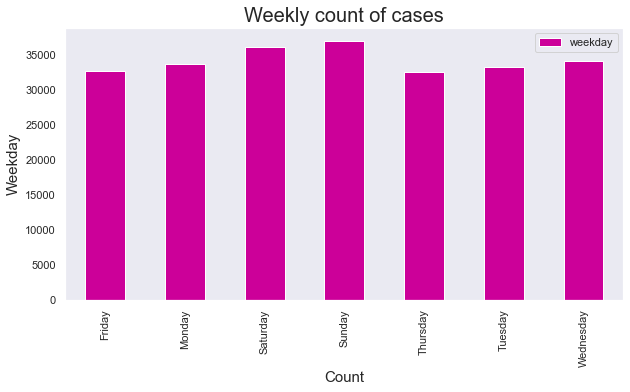

In [105]:
df.groupby('weekday').agg({'weekday':'count'}).plot(kind='bar',figsize=(10,5),color='#cc0099');
plt.grid(False)
plt.title('Weekly count of cases',fontsize=20)
plt.xlabel('Count',fontsize=15)
plt.ylabel('Weekday',fontsize=15);

Number of gun violence incidents are higher on weekends with approximately.

```Saturday and Sunday seems to be most violent days```

**number of incidents by every state**

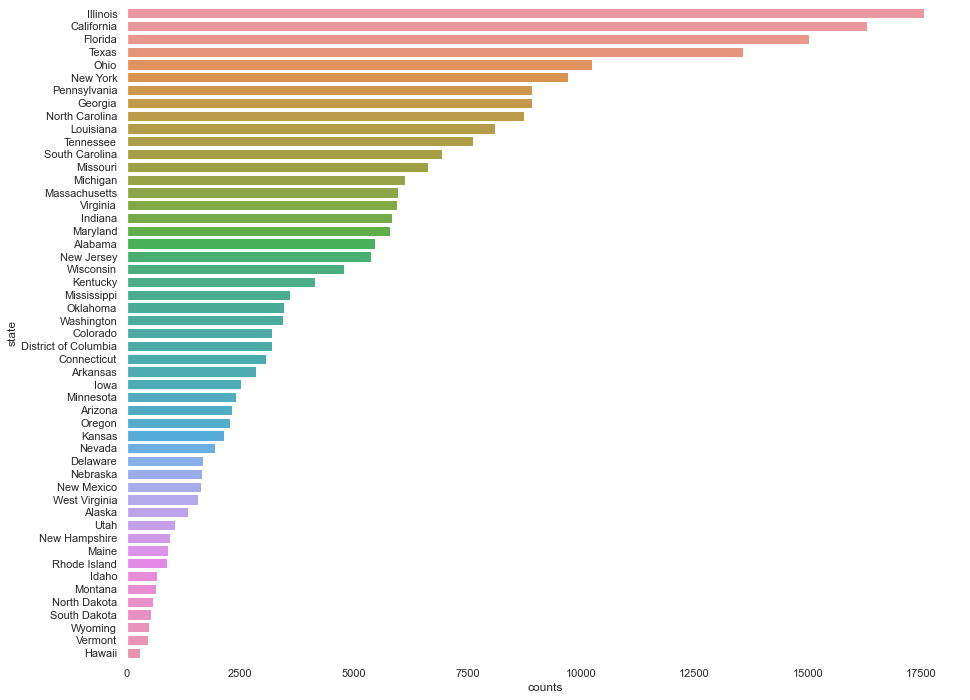

In [106]:
states_df = df['state'].value_counts()
statesdf = pd.DataFrame()
statesdf['state'] = states_df.index
statesdf['counts'] = states_df.values
num_incidents_evey_state = pd.DataFrame(data=statesdf['counts'])
num_incidents_evey_state.set_index(statesdf['state'], inplace=True)
plt.figure(figsize=(15, 12))
ax = plt.axes()
ax.set_facecolor("white")
sns.barplot(x=statesdf['counts'], y=statesdf['state']);

the most violent states in the entire US are as follows:

- **`Illinois`**
- **`California`**
- **`Florida`**
- **`Texas`**
- **`Ohio`**
- **`New York`**


**Incident happend vs violence level**

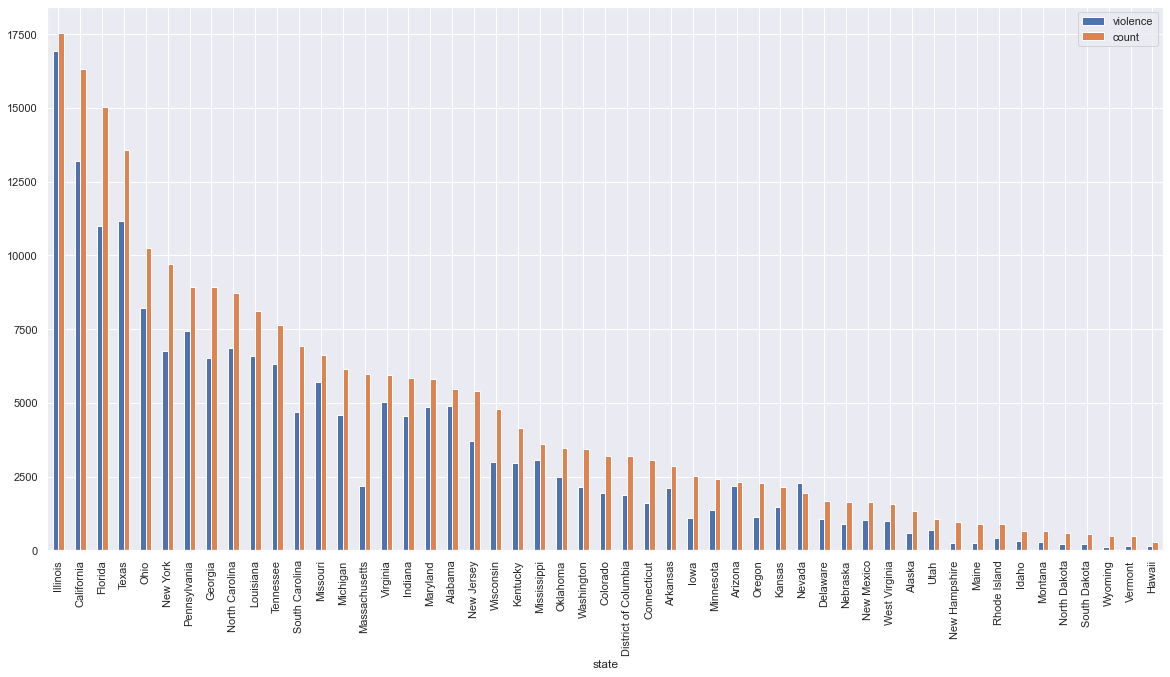

In [107]:
statdf = df.reset_index().groupby(by=['state']).agg({
    'violence': 'sum',
    'year': 'count'
}).rename(columns={'year': 'count'})
statdf['state'] = statdf.index
statdf.sort_values('count', ascending=False, inplace=True)
statdf.plot(kind='bar', figsize=(20, 10));

From this analysis we can see that ``Illinois is more violent than any other state`` as the number of incidents vs violence is very close to each other

**Incidents per 100k by state**

Lets explore how many gun violence incidents occured in different states per 100,000 people. Also, lets identify the states with high number of incidents according to the population of the state as well.

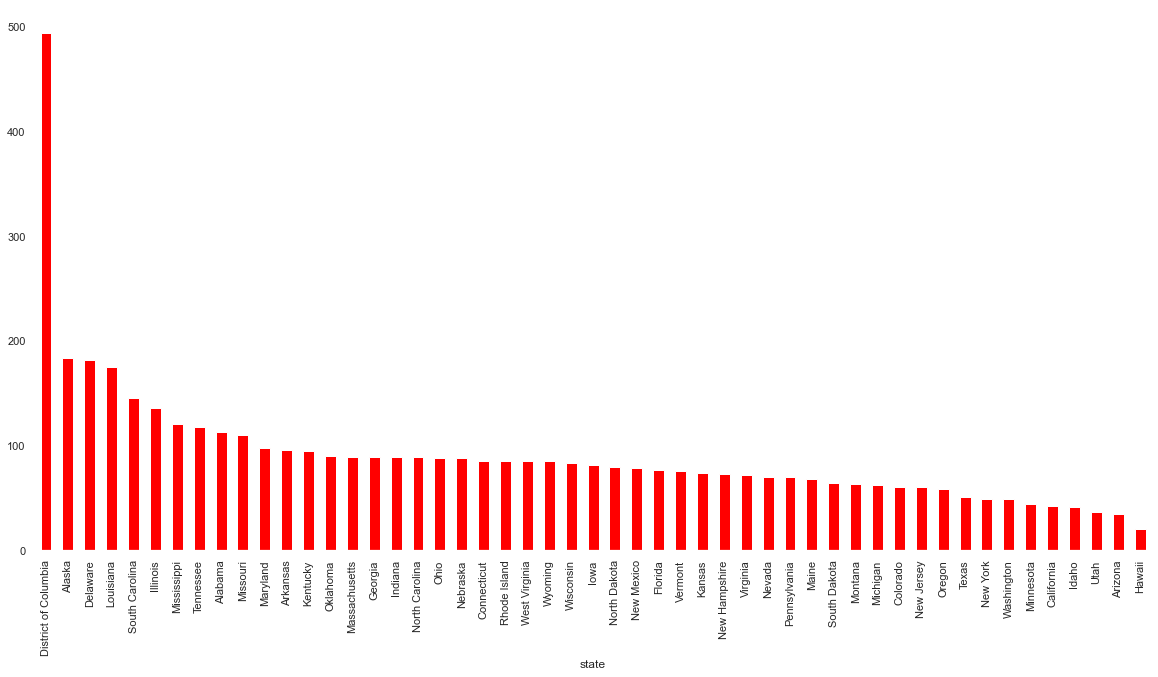

In [108]:
census_2013 = {
    'Mississippi': 2991207,
    'Iowa': 3090416,
    'Oklahoma': 3850568,
    'Delaware': 925749,
    'Minnesota': 5420380,
    'Alaska': 735132,
    'Illinois': 12882135,
    'Arkansas': 2959373,
    'New Mexico': 2085287,
    'Indiana': 6570902,
    'Maryland': 5928814,
    'Louisiana': 4625470,
    'Texas': 26448193,
    'Wyoming': 582658,
    'Arizona': 6626624,
    'Wisconsin': 5742713,
    'Michigan': 9895622,
    'Kansas': 2893957,
    'Utah': 2900872,
    'Virginia': 8260405,
    'Oregon': 3930065,
    'Connecticut': 3596080,
    'New York': 19651127,
    'California': 38332521,
    'Massachusetts': 6692824,
    'West Virginia': 1854304,
    'South Carolina': 4774839,
    'New Hampshire': 1323459,
    'Vermont': 626630,
    'Georgia': 9992167,
    'North Dakota': 723393,
    'Pennsylvania': 12773801,
    'Florida': 19552860,
    'Hawaii': 1404054,
    'Kentucky': 4395295,
    'Rhode Island': 1051511,
    'Nebraska': 1868516,
    'Missouri': 6044171,
    'Ohio': 11570808,
    'Alabama': 4833722,
    'South Dakota': 844877,
    'Colorado': 5268367,
    'Idaho': 1612136,
    'New Jersey': 8899339,
    'Washington': 6971406,
    'North Carolina': 9848060,
    'Tennessee': 6495978,
    'Montana': 1015165,
    'District of Columbia': 646449,
    'Nevada': 2790136,
    'Maine': 1328302
}
statesdf['population'] = statesdf['state'].apply(lambda x: census_2013[x])
statesdf['incidents_per_k'] = statesdf.apply(
    lambda x: float(x['counts']) * 100000 / x['population'], axis=1)
tempdf = statesdf.sort_values('incidents_per_k', ascending=False)
tempdf.set_index('state', inplace=True)
tempdf.sort_values('incidents_per_k', ascending=False, inplace=True)
ax = plt.axes()
ax.set_facecolor("white")
tempdf['incidents_per_k'].plot(kind='bar', figsize=(20, 10), color='red');

District of Columbia and Alaska has the highest number of gun violence incidents per 100,000 people approx. while Arizona, Utah, and Idaho are the states with least number of incidents in population adjusted dataset.

**Common Areas of Gun Violence Incidents**

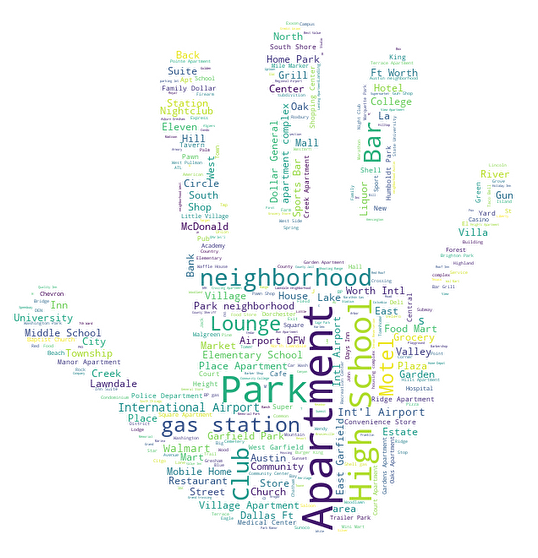

In [109]:
mask = np.array(Image.open("hand.jpg"))
txt = " ".join(df['location_description'].dropna())
wc = WordCloud(max_font_size=50,
               max_words=1000,
               stopwords=STOPWORDS,
               mask=mask,
               background_color='white').generate(txt)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='sinc')
plt.axis('off');

As we can see here `High School, Apartment, Parks, Gas Station, Walmart, Motel, Bar, Club` are very violent 

**Common days of gun violence incidence**

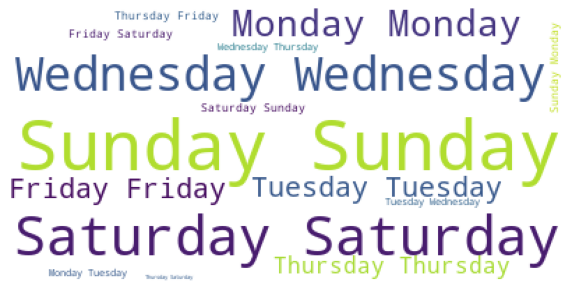

In [110]:
txt = " ".join(df['weekday'].dropna())
wc = WordCloud(max_font_size=50,
               max_words=1000,
               stopwords=STOPWORDS,
               background_color='White').generate(txt)
plt.figure(figsize=(10, 20))
plt.imshow(wc)
plt.axis('off');

**`Sunday,Monday and Wednesday`** are the days that comes most in the violence

**Common months of Gun violence**

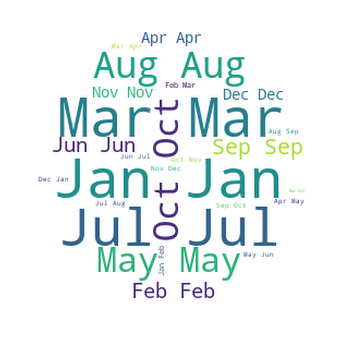

In [111]:
txt = " ".join(df['month'].dropna())
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)
wc = WordCloud(max_font_size=50,
               max_words=1000,
               stopwords=STOPWORDS,
               mask=mask,
               background_color='White').generate(txt)
plt.figure(figsize=(6, 6))
plt.imshow(wc,interpolation='lanczos')
plt.axis('off');

**Jan,Aug,Mar,Jul** are the most violent months 

`Why those months are most violent ?`

we can observe the highest peaks around July 4th and July 5th every year from 2014 to 2017. This is very interesting as `July 4th is celebrated as the Independence Day in United States of America`. From this data, it seems that `4th July - 5th July are` the dates related with very large number of gun violence incidents, hence are the `most dangerous dates`. The holiday can also contributes to the fact that large number of gun violence incidents are reported.

**Participants Gender and  Type visualizations and insights.**

              Gender   Total
0               male  304102
1             female   42376
2  Unrecorded_gender   36362


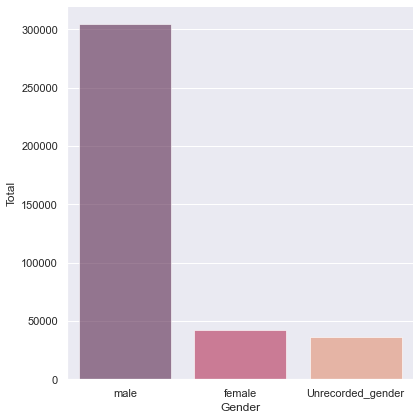

In [112]:
def cols_clean(x):
    cols_index = []
    indexes =str(x).split("||")
    for i in indexes:
        output= str(i).split("::")
        if len(output)>1:
            cols_index.append(output[1])
            
    return cols_index

# #try on one
# cols_clean(df.iloc[0]["participant_gender"])

# participant gender.
df["participant_gender"].fillna("0::Unrecorded", inplace = True)
participants_gender = df["participant_gender"].apply(cols_clean)
df["male"] =  participants_gender.apply(lambda y :y.count("Male"))
df["female"] = participants_gender.apply(lambda y : y.count("Female"))
df["Unrecorded_gender"] = participants_gender.apply(lambda y : y.count("Unrecorded"))
df["total"] = participants_gender.apply(lambda y : len(y))

#participant type
df["participant_type"].fillna("0::Unrecorded_type",inplace = True)
participants_type = df["participant_type"].apply(cols_clean)
df["suspect"] = participants_type.apply(lambda y :y.count("Subject-Suspect"))
df["victims"] = participants_type.apply(lambda y : y.count("Victim"))
df["unrecorded_type"] = participants_type.apply(lambda y:y.count("Unrecorded_type"))

gender_df = df[["male","female","Unrecorded_gender"]].sum().reset_index()
gender_df.rename(columns={"index":"Gender",0:"Total"},inplace = True)
print(gender_df)


sns.catplot(
    data=gender_df, kind="bar",
    x="Gender", y="Total"
    , palette="rocket", alpha=.6, height=6
);

Here we can see that **males are 6.5x more involves in the violence**.while we stil have genders which are not recorded

In [113]:
type_df = df[["victims","suspect","unrecorded_type"]].sum().reset_index()
type_df.rename(columns={"index":"Type",0:"Total"},inplace = True)
print(type_df)

fig = px.bar(type_df, x="Total", y="Type", orientation='h',color='Type')
fig.show()

              Type   Total
0          victims  189600
1          suspect  195913
2  unrecorded_type   24863


**Analysis of types of guns used in the gun violence**

In [114]:
df["gun_type"].fillna("0::Unknown", inplace = True)
gun_type = df["gun_type"].apply(cols_clean)
gun_type.head()

0             [Unknown]
1             [Unknown]
2    [Unknown, Unknown]
3             [Unknown]
4    [Handgun, Handgun]
Name: gun_type, dtype: object

Finding the unique types of guns for mapping.

In [115]:
guntype_df = gun_type.reset_index()
guntype_df["gun_type"].explode().unique()

array(['Unknown', 'Handgun', '22 LR', '223 Rem [AR-15]', 'Shotgun', '9mm',
       '45 Auto', '12 gauge', '7.62 [AK-47]', '40 SW', '44 Mag', 'Other',
       '38 Spl', '380 Auto', '410 gauge', '32 Auto', '308 Win', 'Rifle',
       '357 Mag', '16 gauge', '30-30 Win', '25 Auto', nan, '10mm',
       '20 gauge', '30-06 Spr', '300 Win', '28 gauge'], dtype=object)

In [116]:
df['Unknown']=gun_type.apply(lambda y :y.count('Unknown'))
df['Handgun']=gun_type.apply(lambda y :y.count('Handgun'))
df['22 LR']=gun_type.apply(lambda y :y.count('22 LR'))
df['223 Rem [AR-15]']=gun_type.apply(lambda y :y.count('223 Rem [AR-15]'))
df['Shotgun']=gun_type.apply(lambda y :y.count('Shotgun'))
df['9mm']=gun_type.apply(lambda y :y.count('9mm'))
df['45 Auto']=gun_type.apply(lambda y :y.count('45 Auto'))
df['12 gauge']=gun_type.apply(lambda y :y.count('12 gauge'))
df['7.62 [AK-47]']=gun_type.apply(lambda y :y.count('7.62 [AK-47]'))
df['40 SW']=gun_type.apply(lambda y :y.count('40 SW'))
df['44 Mag']=gun_type.apply(lambda y :y.count('44 Mag'))
df['Other']=gun_type.apply(lambda y :y.count('Other'))
df['38 Spl']=gun_type.apply(lambda y :y.count('38 Spl'))
df['380 Auto']=gun_type.apply(lambda y :y.count('380 Auto'))
df['410 gauge']=gun_type.apply(lambda y :y.count('Unknown'))
df['32 Auto']=gun_type.apply(lambda y :y.count('410 gauge'))
df['308 Win']=gun_type.apply(lambda y :y.count('308 Win'))
df['Rifle']=gun_type.apply(lambda y :y.count('Rifle'))
df['357 Mag']=gun_type.apply(lambda y :y.count('357 Mag'))
df['16 gauge']=gun_type.apply(lambda y :y.count('16 gauge'))
df['30-30 Win']=gun_type.apply(lambda y :y.count('30-30 Win'))
df['25 Auto']=gun_type.apply(lambda y :y.count('25 Auto'))
df['10mm']=gun_type.apply(lambda y :y.count('10mm'))
df['20 gauge']=gun_type.apply(lambda y :y.count('20 gauge'))
df['30-06 Spr']=gun_type.apply(lambda y :y.count('30-06 Spr'))
df['300 Win']=gun_type.apply(lambda y :y.count('300 Win'))
df['28 gauge']=gun_type.apply(lambda y :y.count('28 gauge'))

In [117]:
guns_df =df[['Unknown', 'Handgun', '22 LR', '223 Rem [AR-15]', 'Shotgun', '9mm',
       '45 Auto', '12 gauge', '7.62 [AK-47]', '40 SW', '44 Mag', 'Other',
       '38 Spl', '380 Auto', '410 gauge', '32 Auto', '308 Win', 'Rifle',
       '357 Mag', '16 gauge', '30-30 Win', '25 Auto', '10mm',
       '20 gauge', '30-06 Spr', '300 Win', '28 gauge']].sum().reset_index()
guns_df.rename(columns = {"index":"Guntype",0:"Total"},inplace = True)
guns_df.head()

,Guntype,Total
0,Unknown,230289
1,Handgun,25038
2,22 LR,3346
3,223 Rem [AR-15],1613
4,Shotgun,4263


In [118]:
guns_df.sort_values(by=["Total", "Guntype"], ascending=[True, False], inplace=True)
fig = px.bar(guns_df, x="Total", y="Guntype", orientation='h',color='Guntype',width=800, height=1000)
fig.update_traces(width=1.5)
fig.show()

In [119]:
guns_df["Total"].sort_values(ascending = True).head()


26     6
25    23
19    32
22    50
24    84
Name: Total, dtype: int64

In [120]:
print(guns_df.iloc[26])
print(guns_df.iloc[0])
print(guns_df.iloc[14])

Guntype    410 gauge
Total         230289
Name: 14, dtype: object
Guntype    28 gauge
Total             6
Name: 26, dtype: object
Guntype    12 gauge
Total          1112
Name: 7, dtype: object


From the visualization and the output above it is evident that the type of guns used mostly are unknown not recorded followed the 410 gauge used. The gun that is least used is the 28 gauge type.

**Number of guns used in incidents**

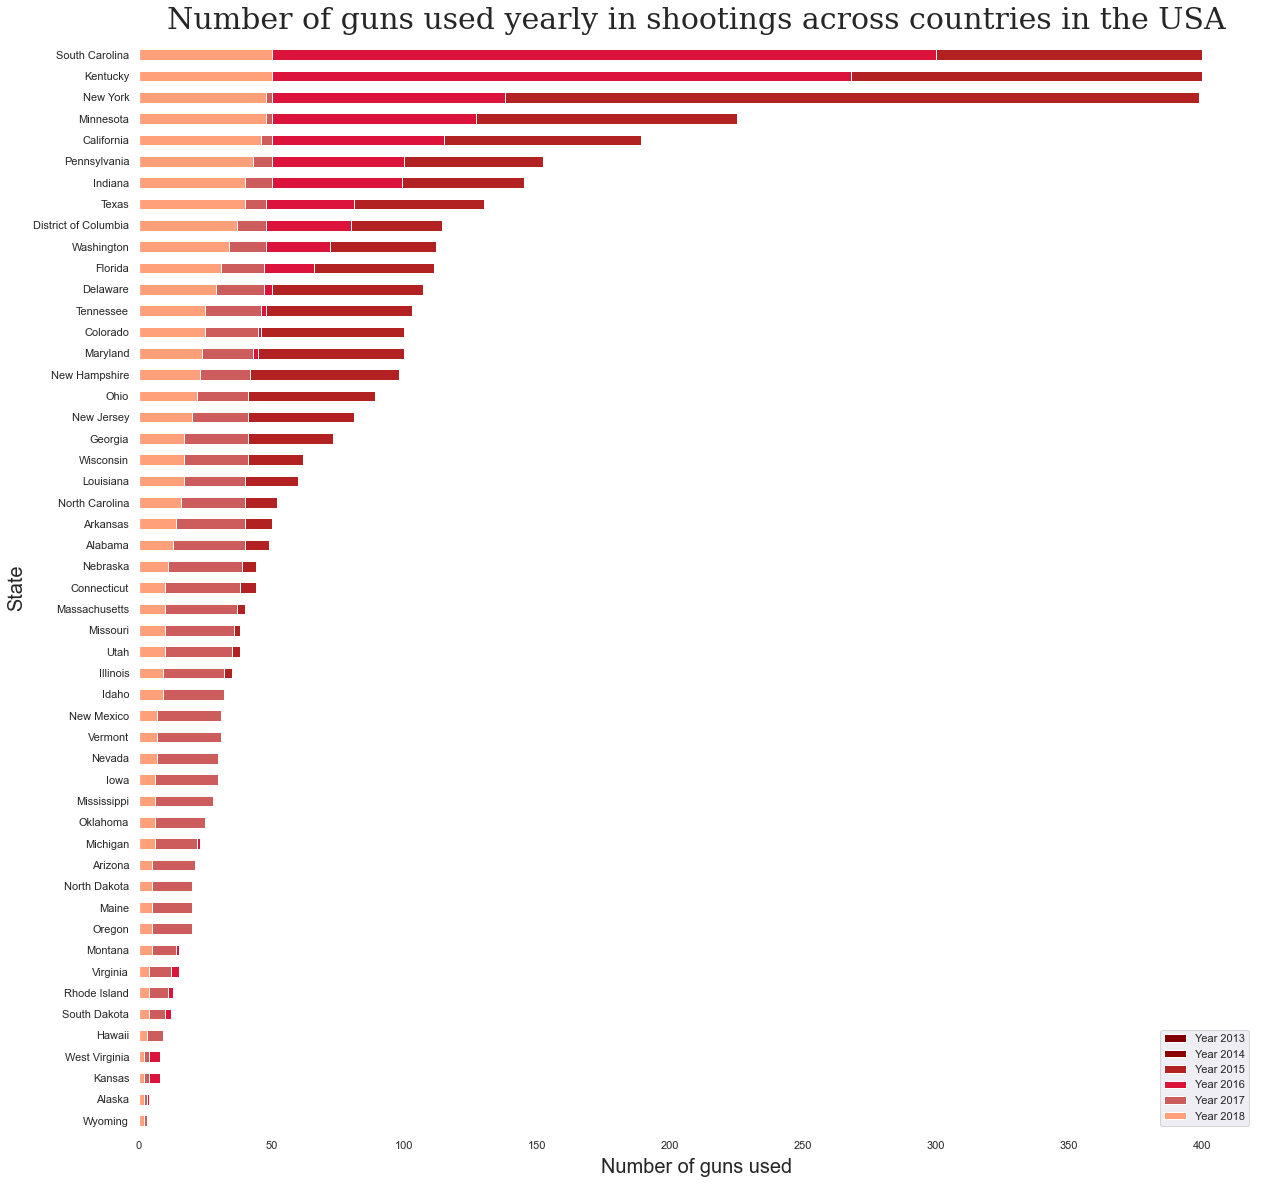

In [121]:
my_df = df[['n_guns_involved', 'year', 'state']].dropna()

Y2013 = my_df[my_df['year']==2013].drop(columns='year')
Y2013=Y2013.groupby('state')['n_guns_involved'].max()
Y2013.sort_values(inplace=True)

Y2014 = my_df[my_df['year']==2014].drop(columns='year')
Y2014=Y2014.groupby('state')['n_guns_involved'].max()
Y2014.sort_values(inplace=True)

Y2015 = my_df[my_df['year']==2015].drop(columns='year')
Y2015=Y2015.groupby('state')['n_guns_involved'].max()
Y2015.sort_values(inplace=True)

Y2016 = my_df[my_df['year']==2016].drop(columns='year')
Y2016=Y2016.groupby('state')['n_guns_involved'].max()
Y2016.sort_values(inplace=True)

Y2017 = my_df[my_df['year']==2017].drop(columns='year')
Y2017=Y2017.groupby('state')['n_guns_involved'].max()
Y2017.sort_values(inplace=True)

Y2018 = my_df[my_df['year']==2018].drop(columns='year')
Y2018=Y2018.groupby('state')['n_guns_involved'].max()
Y2018.sort_values(inplace=True)

ax = plt.axes()
ax.set_facecolor("white")
Y2013.plot(kind='barh',figsize=(20,20),color='#800000',legend=True, label='Year 2013');
Y2014.plot(kind='barh',figsize=(20,20),color='#8B0000',legend=True, label='Year 2014');
Y2015.plot(kind='barh',figsize=(20,20),color='#B22222',legend=True, label='Year 2015');
Y2016.plot(kind='barh',figsize=(20,20),color='#DC143C',legend=True, label='Year 2016');
Y2017.plot(kind='barh',figsize=(20,20),color='#CD5C5C',legend=True, label='Year 2017');
Y2018.plot(kind='barh',figsize=(20,20),color='#FFA07A',legend=True, label='Year 2018');

plt.xlabel('Number of guns used', labelpad=7, loc='center', fontsize=20)
plt.ylabel('State', labelpad=7, fontsize=20)
plt.title('Number of guns used yearly in shootings across countries in the USA',pad=15, fontsize=30, fontfamily='Serif');

In South Carolina ,Kentucky and New York has Number of guns used yearly in shootings across countries in the USA.
While `Kansas,Alaska,Wyoming are the safest ones`.

**Overall number of guns involved**

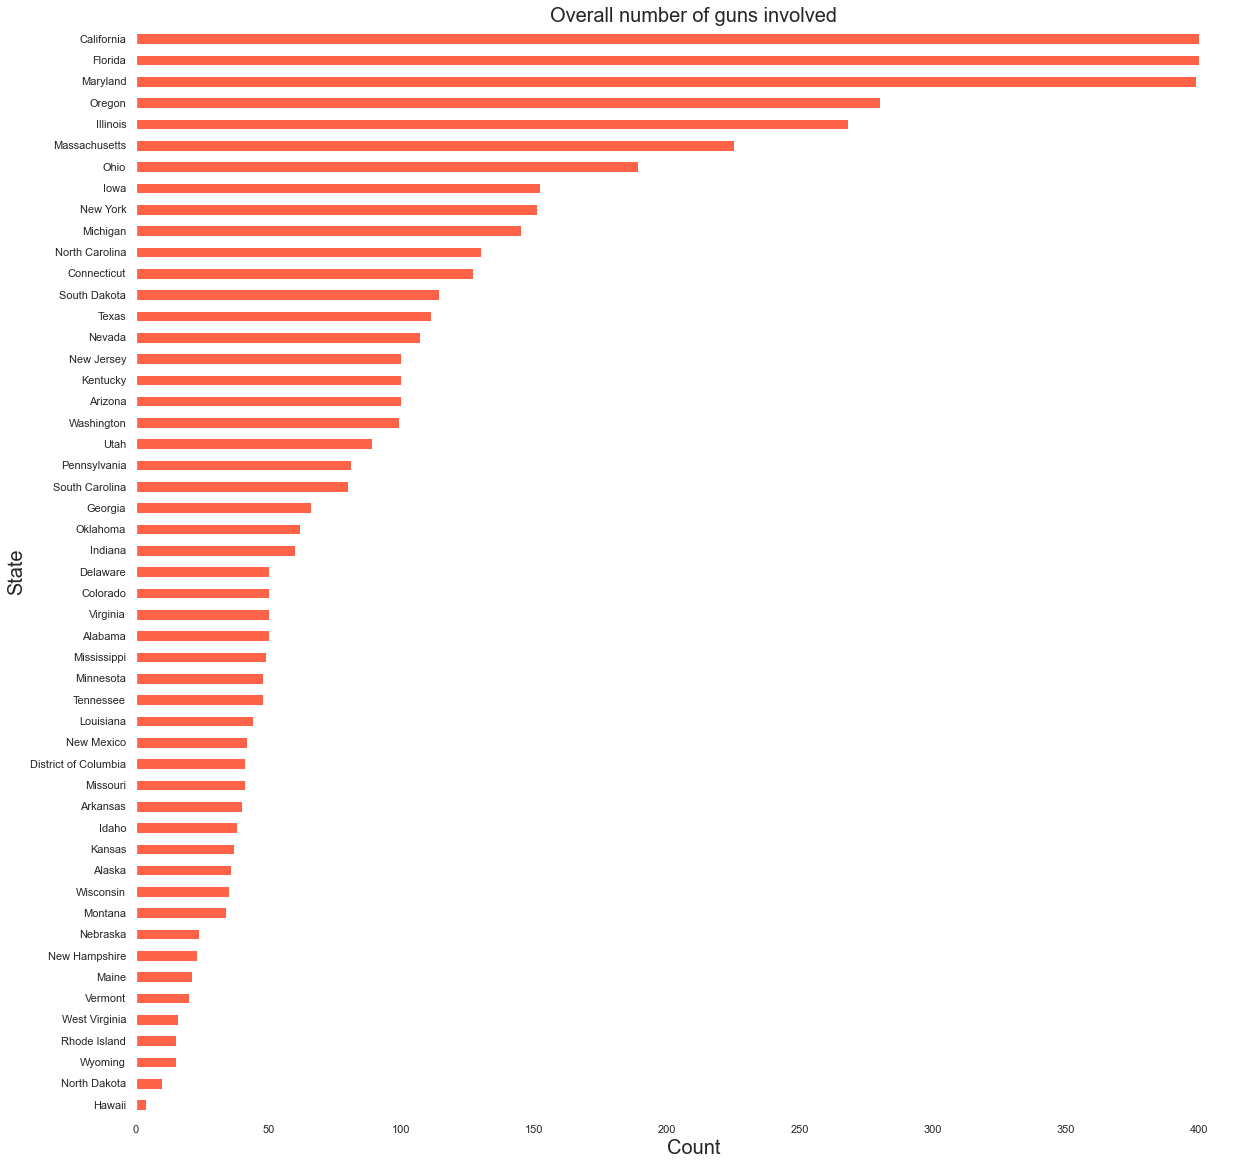

In [122]:
Yearwise=pd.concat([Y2013,Y2014,Y2015,Y2016,Y2017,Y2018])
Yearwise=Yearwise.groupby('state').max()
Yearwise.sort_values(inplace=True)
ax = plt.axes()
ax.set_facecolor("white")
Yearwise.plot(kind='barh',figsize=(20,20),color='#ff6347');
plt.grid(False)
plt.title('Overall number of guns involved',fontsize=20)
plt.xlabel('Count',fontsize=20)
plt.ylabel('State',fontsize=20);

But in overall California ,Florida and Maryland comes on the top for Overall number of guns involved.
While Hawaii is the safest to explore.

**`This is interesting as now we can go to Hawaii for weekends as during the weekends there is more violence in the city`**.

**Incidents per 100k by city**

In [123]:
population_in_2016 = {
    'Carol Stream': '40069',
    'La Quinta': '40956',
    'Leander': '42761',
    'Edinburg': '87650',
    'Chino Hills': '78822',
    'Pinellas Park': '52137',
    'Pacifica': '39062',
    'San Luis Obispo': '47536',
    'Apache Junction': '39954',
    'Toledo': '278508',
    'Nampa': '91382',
    'Jurupa Valley': '103541',
    'Renton': '100953',
    'Joplin': '52195',
    'Pomona': '152494',
    'Hoover': '84978',
    'Columbia': '134309',
    'Maple Grove': '69576',
    'Rowlett': '61999',
    'Bayonne': '66238',
    'Fremont': '233136',
    'Scottsdale': '246645',
    'Bozeman': '45250',
    'El Paso': '683080',
    'Santa Maria': '106290',
    'Cedar Park': '68918',
    'Shelton': '41334',
    'Atlanta': '472522',
    'Kettering': '55306',
    'Bartlett': '58622',
    'Orem': '97499',
    'Bullhead City': '39970',
    'Bradenton': '55687',
    'Waterloo': '67934',
    'Scranton': '77291',
    'Glendora': '51851',
    'Lakeland': '106420',
    'West Valley City': '136574',
    'Moreno Valley': '205499',
    'Brea': '42471',
    'Normal': '54264',
    'Bolingbrook': '74518',
    'Rocky Mount': '55466',
    'Redding': '91808',
    'Chico': '91567',
    'Virginia Beach': '452602',
    'Charlotte': '842051',
    'Parker': '51163',
    'Bloomington': '85319',
    'Wake Forest': '40112',
    'Beaumont': '118299',
    'Huntersville': '54839',
    'Oakland Park': '44326',
    'Beavercreek': '46376',
    'Broken Arrow': '107403',
    'Seattle': '704352',
    'Santa Barbara': '91930',
    'Sandy': '95836',
    'El Monte': '115807',
    'Grand Island': '51517',
    'Santa Monica': '92478',
    'Ocala': '59253',
    'Oro Valley': '43781',
    'Waco': '134432',
    'Midwest City': '57305',
    'Allentown': '120443',
    'Garden Grove': '174858',
    'Bellflower': '77790',
    'Denver': '693060',
    'Minot': '48743',
    'Des Plaines': '58141',
    'Burlington': '52709',
    'Orange': '140504',
    'Dunwoody': '48884',
    'San Mateo': '103959',
    'Minnetonka': '52369',
    'Eagan': '66428',
    'Oceanside': '175464',
    'Avondale': '82881',
    'Alameda': '78906',
    'San Diego': '1406630',
    'Haverhill': '62873',
    'Waukegan': '88182',
    'Daytona Beach': '66645',
    'Grove City': '39721',
    'Altoona': '44589',
    'Hamilton': '62127',
    'Kirkland': '87701',
    'Honolulu': '351792',
    'Macon-Bibb County': '152555',
    'Stillwater': '49504',
    'Colorado Springs': '465101',
    'Cedar Hill': '48343',
    'Jupiter': '63813',
    'Overland Park': '188966',
    'Boise City': '223154',
    'Missoula': '72364',
    'Burbank': '104447',
    'Youngstown': '64312',
    'Sunnyvale': '152771',
    'Hoboken': '54379',
    'Ankeny': '58627',
    'Harrisonburg': '53078',
    'Rancho Santa Margarita': '48969',
    'Fitchburg': '40414',
    'Revere': '53157',
    'Fountain Valley': '56529',
    'San Bruno': '42957',
    'Pembroke Pines': '168587',
    'Friendswood': '39396',
    'Bountiful': '44078',
    'Terre Haute': '60852',
    'Methuen': '49917',
    'Las Vegas': '632912',
    'South San Francisco': '66980',
    'Cedar Falls': '41390',
    'Carlsbad': '113952',
    'Quincy': '93688',
    'Waterbury': '108272',
    'Thornton': '136703',
    'Mount Pleasant': '84170',
    'Livermore': '89115',
    'Lansing': '116020',
    'Richmond': '223170',
    'Providence': '179219',
    'Clearwater': '114361',
    'Pasadena': '153351',
    'Clovis': '106583',
    'Augusta-Richmond County': '197081',
    'Lacey': '47688',
    'East Providence': '47337',
    'Columbus': '860090',
    'Indianapolis': '855164',
    'Danbury': '84992',
    'Sarasota': '56610',
    'Mountain View': '80447',
    'South Bend': '101735',
    'Watsonville': '53796',
    'Ann Arbor': '120782',
    'Valdosta': '56474',
    'Berwyn': '55748',
    'Akron': '197633',
    'Memphis': '652717',
    'Enid': '51004',
    'Brighton': '38314',
    'Lake Charles': '76848',
    'West Lafayette': '45872',
    'Littleton': '46333',
    'Orlando': '277173',
    'Loveland': '76897',
    'Spanish Fork': '38861',
    'Edmonds': '41840',
    'Goose Creek': '42039',
    'Monterey Park': '61075',
    'Woburn': '39452',
    'Upland': '76684',
    'Edina': '51350',
    'Bowling Green': '65234',
    'Oxnard': '207906',
    'San Rafael': '58954',
    'Costa Mesa': '112822',
    'Roseville': '132671',
    'Birmingham': '212157',
    'Bothell': '44546',
    'Buckeye': '64629',
    'Oklahoma City': '638367',
    'Broomfield': '66529',
    'Hattiesburg': '46926',
    'West Des Moines': '64560',
    'Denton': '133808',
    'Weslaco': '40033',
    'Flagstaff': '71459',
    'Annapolis': '39418',
    'Yucaipa': '53309',
    'West Palm Beach': '108161',
    'West Jordan': '113699',
    'Bonita Springs': '54198',
    'Plainfield': '50636',
    'Buffalo Grove': '41346',
    'Utica': '60652',
    'Paterson': '147000',
    'Fond du Lac': '42951',
    'Harlingen': '65539',
    'Ocoee': '44820',
    'Moline': '42250',
    'Paramount': '54909',
    'Winter Garden': '41988',
    'Phoenix': '1615017',
    'State College': '41992',
    'Irving': '238289',
    'Edmond': '91191',
    'Manhattan': '54983',
    'Pocatello': '54746',
    'Hartford': '123243',
    'Missouri City': '74561',
    'Summerville': '49323',
    'Joliet': '148262',
    'Azusa': '49628',
    'Alpharetta': '65338',
    'Boynton Beach': '75569',
    'North Las Vegas': '238702',
    'Sioux Falls': '174360',
    'Chattanooga': '177571',
    'Port Orange': '61105',
    'Federal Way': '96757',
    'Lexington-Fayette': '318449',
    'Riverton': '42838',
    'Chesapeake': '237940',
    'Compton': '97550',
    'Smyrna': '56664',
    'Rock Island': '38210',
    'Duluth': '86293',
    'Petaluma': '60530',
    'Doral': '57947',
    'Wheaton': '53389',
    'Oak Park': '51774',
    'Wheeling': '38315',
    'St. Louis': '311404',
    'Ceres': '48278',
    'Tallahassee': '190894',
    'Lakewood': '154393',
    'Mount Prospect': '54171',
    'Nashua': '87882',
    'Rocklin': '62787',
    'Woonsocket': '41406',
    'Salinas': '157218',
    'Janesville': '64159',
    'New Rochelle': '79557',
    'Euclid': '47360',
    'Turlock': '72796',
    'Schenectady': '64913',
    'McKinney': '172298',
    'Yorba Linda': '68235',
    'Redondo Beach': '67867',
    'Bowie': '58393',
    'Grapevine': '51971',
    'Arlington': '392772',
    'Perth Amboy': '52499',
    'Wyoming': '75567',
    'Montgomery': '200022',
    'Newark': '281764',
    'Apple Valley': '72553',
    'Wilson': '49620',
    'Sandy Springs': '105703',
    'Charlottesville': '46912',
    'Warwick': '81579',
    'Pico Rivera': '63635',
    'Irvine': '266122',
    'Waltham': '63002',
    'Chesterfield': '47659',
    'Palm Beach Gardens': '53778',
    'Lodi': '64641',
    'Stanton': '38644',
    'Thousand Oaks': '128888',
    'Harrisburg': '48904',
    'Elyria': '53715',
    'Marlborough': '39697',
    'Menifee': '88531',
    'Fort Wayne': '264488',
    'Conroe': '82286',
    'Medford': '81636',
    'Rochester Hills': '73422',
    'Jonesboro': '74889',
    'Carrollton': '133351',
    'Lenexa': '52903',
    'West New York': '53343',
    'Vallejo': '121299',
    'Cutler Bay': '44707',
    'Norfolk': '245115',
    'Rogers': '65021',
    'Colton': '54712',
    'Miami': '453579',
    'Lorain': '63730',
    'Kyle': '39060',
    'Cerritos': '50555',
    'Topeka': '126808',
    'Kenosha': '99631',
    'New Britain': '72558',
    'Brookhaven': '52444',
    'Glenview': '47475',
    'Montclair': '38944',
    'Tigard': '51902',
    'Indio': '88488',
    'East Lansing': '48870',
    'North Port': '64274',
    'Pittsburg': '70679',
    'Savannah': '146763',
    'Newton': '89045',
    'Pharr': '77320',
    'Fort Worth': '854113',
    'McAllen': '142212',
    'Palm Coast': '85109',
    'North Little Rock': '66278',
    'Gary': '76424',
    'Orland Park': '58862',
    'Gilroy': '55069',
    'Coppell': '41360',
    'Maricopa': '46903',
    'Pearland': '113570',
    'Sparks': '98345',
    'Evanston': '74895',
    'San Clemente': '65309',
    'Hesperia': '93724',
    'Port St. Lucie': '185132',
    'Reading': '87575',
    'Rosemead': '54500',
    'Gilbert': '237133',
    'Laredo': '257156',
    'Folsom': '77271',
    'Bossier City': '68485',
    'Elizabeth': '128640',
    'Westland': '81545',
    'Everett': '109043',
    'Hawthorne': '88031',
    'Dubuque': '58531',
    'Hilton Head Island': '40500',
    'Palm Bay': '110104',
    'Newport News': '181825',
    'Hanford': '55547',
    'Manchester': '110506',
    'Chino': '87776',
    'Euless': '54769',
    'Cranston': '81034',
    'Miami Beach': '91917',
    'St. Charles': '69293',
    'Florissant': '51776',
    'Diamond Bar': '56793',
    'Iowa City': '74398',
    'Kentwood': '51689',
    'Barnstable Town': '44254',
    'Frisco': '163656',
    'Tucson': '530706',
    'Apopka': '49458',
    'Urbandale': '43018',
    'St. Louis Park': '48747',
    'Westfield': '41552',
    'Redwood City': '84950',
    'Buffalo': '256902',
    'Cambridge': '110651',
    'Lake Oswego': '38945',
    'Boston': '673184',
    'Kennewick': '80454',
    'Dayton': '140489',
    'Delray Beach': '67371',
    'Layton': '75655',
    'Owensboro': '59273',
    'Sunrise': '93734',
    'Arlington Heights': '75525',
    'Huntington': '48113',
    'Erie': '98593',
    'Longview': '82055',
    'Norwalk': '106178',
    'Sanford': '58605',
    'Ontario': '173212',
    'Eastvale': '61151',
    'Georgetown': '67140',
    'Noblesville': '60183',
    'Jackson': '169148',
    'Hollywood': '151998',
    'New Braunfels': '73959',
    'Miramar': '138449',
    'West Haven': '54516',
    'Prescott Valley': '43132',
    'Novi': '59211',
    'Rancho Palos Verdes': '42435',
    'Placentia': '52228',
    'Miami Gardens': '113058',
    'Alhambra': '85474',
    'Jeffersonville': '47124',
    'Blue Springs': '54431',
    'Shreveport': '194920',
    'Escondido': '151613',
    'Mesa': '484587',
    'Cathedral City': '54056',
    'Sioux City': '82872',
    'Lincoln': '280364',
    'Great Falls': '59178',
    'Vineland': '60525',
    'Rockville': '66940',
    'Hagerstown': '40452',
    'La Crosse': '52109',
    'Fort Smith': '88133',
    'Tinley Park': '56831',
    'Malden': '60840',
    'Beverly': '41365',
    'Lawton': '94653',
    'Flower Mound': '73547',
    'Kalamazoo': '75984',
    'Wichita Falls': '104724',
    'Concord': '128726',
    'Morgan Hill': '44155',
    'Anderson': '55130',
    'Schertz': '39453',
    'Auburn': '77472',
    'New York': '8537673',
    'Hendersonville': '57050',
    'Hurst': '39160',
    'Casper': '59324',
    'Ormond Beach': '42162',
    'Buena Park': '83156',
    'Haltom City': '44361',
    'Rockwall': '43586',
    'Abilene': '122225',
    'Crystal Lake': '40339',
    'Lubbock': '252506',
    'Sumter': '40723',
    'Philadelphia': '1567872',
    'Westminster': '113875',
    'Downey': '113267',
    'Parma': '79425',
    'Danville': '44631',
    'DeKalb': '43194',
    'Fort Myers': '77146',
    'North Lauderdale': '43699',
    'Torrance': '147195',
    'Odessa': '117871',
    'Sayreville': '44905',
    'Shoreline': '55333',
    'Muskogee': '38352',
    'Mankato': '41720',
    'Linden': '42457',
    'Logan': '50676',
    'Grand Junction': '61881',
    'Grand Rapids': '196445',
    'Carpentersville': '38291',
    'Antioch': '110898',
    'Sheboygan': '48686',
    'Appleton': '74370',
    'Dothan': '68468',
    'Decatur': '72706',
    'Pueblo': '110291',
    'Greenacres': '40013',
    'Hallandale Beach': '39500',
    'Elk Grove': '169743',
    'Cape Girardeau': '39628',
    'Ogden': '86701',
    'Frederick': '70060',
    'Lafayette': '127626',
    'Manassas': '41483',
    'Prescott': '42513',
    'Kannapolis': '47839',
    'San Bernardino': '216239',
    'Pleasant Grove': '38756',
    'Romeoville': '39706',
    'El Centro': '44201',
    'Galveston': '50550',
    'Trenton': '84056',
    'Fall River': '88930',
    'Chapel Hill': '59246',
    'Coral Gables': '50815',
    'Union City': '75322',
    'Coon Rapids': '62359',
    'Suffolk': '89273',
    'Lauderhill': '71626',
    'Encinitas': '63131',
    'Bend': '91122',
    'La Puente': '40377',
    'Corpus Christi': '325733',
    'Marion': '38480',
    'Duncanville': '39457',
    'Hickory': '40567',
    'Sierra Vista': '43208',
    'Hammond': '77134',
    'Shawnee': '65194',
    'South Gate': '95538',
    'Burnsville': '61290',
    'Ames': '66191',
    'Davis': '68111',
    'Clarksville': '150287',
    'Kent': '127514',
    'Charleston': '134385',
    'Collierville': '49177',
    'Lynchburg': '80212',
    'Independence': '117030',
    'Henderson': '292969',
    'Redmond': '62458',
    'Tulsa': '403090',
    'Laguna Niguel': '65328',
    'Sacramento': '495234',
    'Johns Creek': '83873',
    'Lewisville': '104659',
    'York': '43859',
    'Fishers': '90127',
    'DeSoto': '52599',
    'Biloxi': '45975',
    'Whittier': '86883',
    'Camarillo': '67363',
    'Redlands': '71288',
    'The Colony': '42408',
    'Saginaw': '48984',
    'Altamonte Springs': '43492',
    'Dublin': '59583',
    'Jefferson City': '43013',
    'Cedar Rapids': '131127',
    'Mentor': '46732',
    'Sherman': '41567',
    'Rio Rancho': '96028',
    'Largo': '83065',
    'St. Cloud': '67641',
    'Niagara Falls': '48632',
    'Santa Clarita': '181972',
    'Olympia': '51202',
    'Warner Robins': '74388',
    'Moore': '61415',
    'Sammamish': '63773',
    'Washington': '681170',
    'Covington': '40797',
    'Minneapolis': '413651',
    'Cuyahoga Falls': '49206',
    'Visalia': '131074',
    'Livonia': '94041',
    'Salt Lake City': '193744',
    'Casa Grande': '54534',
    'Allen': '99179',
    'Chula Vista': '267172',
    'Pawtucket': '71427',
    'White Plains': '58241',
    'Camden': '74420',
    'Manteca': '76908',
    'Gulfport': '72076',
    'Rochester': '208880',
    'Fontana': '209665',
    'Knoxville': '186239',
    'San Leandro': '90465',
    'Arvada': '117453',
    'Rapid City': '74048',
    'Kokomo': '57799',
    'Bremerton': '40675',
    'Cheyenne': '64019',
    'Grand Forks': '57339',
    'Surprise': '132677',
    'Downers Grove': '49473',
    'San Buenaventura (Ventura)': '109592',
    'Evansville': '119477',
    'St. Peters': '57289',
    'Cicero': '82992',
    'Coral Springs': '130059',
    'Poway': '50077',
    'Southaven': '53214',
    'Taylorsville': '60436',
    'Pontiac': '59698',
    'Hempstead': '55555',
    'Wausau': '38872',
    'Aurora': '361710',
    'Lehi': '61130',
    'New Orleans': '391495',
    'Elmhurst': '46387',
    'Los Angeles': '3976322',
    'Strongsville': '44631',
    'San Antonio': '1492510',
    'Rockford': '147651',
    'Marana': '43474',
    'Kenner': '67089',
    'North Charleston': '109298',
    'Bell Gardens': '42806',
    'Bridgeport': '145936',
    'Hoffman Estates': '51738',
    'Blacksburg': '45038',
    'Milford': '52536',
    'Tustin': '80395',
    'Round Rock': '120892',
    'Streamwood': '40166',
    'College Station': '112141',
    'Sugar Land': '88177',
    'Pompano Beach': '109393',
    'Maplewood': '40150',
    'Cupertino': '60643',
    'Portsmouth': '95252',
    'Daly City': '106472',
    'Battle Creek': '51534',
    'Santa Fe': '83875',
    'Holyoke': '40280',
    'Modesto': '212175',
    'Mesquite': '143736',
    'La Mirada': '49216',
    'Eden Prairie': '63914',
    'Tacoma': '211277',
    'Cypress': '48906',
    'Weymouth Town': '55972',
    'Palm Springs': '47689',
    'Santa Clara': '125948',
    'Kearny': '42126',
    'Delaware': '38643',
    'Fullerton': '140721',
    'San Gabriel': '40404',
    'Schaumburg': '74446',
    'Santa Ana': '334217',
    'Riverside': '324722',
    'Lompoc': '43712',
    'Temple': '73600',
    'Peachtree Corners': '42773',
    'Cary': '162320',
    'Victorville': '122265',
    'Johnson City': '66677',
    'Chicago': '2704958',
    'Cape Coral': '179804',
    'Farmington': '41629',
    'Apex': '47349',
    'El Cajon': '103768',
    'Marietta': '60941',
    'Mansfield': '65631',
    'Perris': '76331',
    'Twin Falls': '48260',
    'League City': '102010',
    'Germantown': '39056',
    'Rohnert Park': '42622',
    'New Bedford': '95032',
    'Port Arthur': '55427',
    'Leominster': '41663',
    'Puyallup': '40640',
    'Wellington': '63900',
    'West Allis': '60087',
    'Anaheim': '351043',
    'Richardson': '113347',
    'Fayetteville': '204759',
    'Davenport': '102612',
    'New Brunswick': '56910',
    'Sterling Heights': '132427',
    'Elgin': '112123',
    "Lee's Summit": '96076',
    'Conway': '65300',
    'Deltona': '90124',
    'North Miami Beach': '43891',
    'Merced': '82594',
    'Worcester': '184508',
    'Delano': '52707',
    'Martinez': '38259',
    'Salem': '167419',
    'Bethlehem': '75293',
    'St. George': '82318',
    'Cleveland': '385809',
    'Campbell': '40939',
    'Lynwood': '71187',
    'Leesburg': '52607',
    'Somerville': '81322',
    'City': '2016 Population',
    'Temecula': '113054',
    'Inglewood': '110654',
    'Bismarck': '72417',
    'Murrieta': '111674',
    'Pensacola': '53779',
    'Hackensack': '44756',
    'Plantation': '92706',
    'St. Clair Shores': '59775',
    'Coachella': '44953',
    'Chandler': '247477',
    'Lowell': '110558',
    'Oak Lawn': '56257',
    'Mishawaka': '48679',
    'Norwich': '39556',
    'Huntsville': '193079',
    'Lake Havasu City': '53743',
    'Amarillo': '199582',
    'Hemet': '84281',
    'Mobile': '192904',
    'Fort Pierce': '45295',
    'Rancho Cordova': '72326',
    'San Ramon': '75639',
    'Oshkosh': '66579',
    'Muskegon': '38349',
    'Plano': '286057',
    'Beaverton': '97590',
    'Waukesha': '72363',
    'San Angelo': '100702',
    'Centennial': '109932',
    'Bakersfield': '376380',
    'Gastonia': '75536',
    'Chelsea': '39699',
    'Anchorage': '298192',
    'Athens-Clarke County': '123371',
    'Freeport': '43279',
    'Kansas City': '481420',
    'Skokie': '64270',
    'Deerfield Beach': '79764',
    'Culver City': '39364',
    'Raleigh': '458880',
    'Bristol': '60147',
    'Glendale': '245895',
    'Monroe': '49297',
    'Rialto': '103314',
    'Carmel': '91065',
    'Houston': '2303482',
    'Hampton': '135410',
    'Garland': '234943',
    'Cleveland Heights': '44633',
    'Gresham': '111523',
    'Reno': '245255',
    'Council Bluffs': '62524',
    'Citrus Heights': '87432',
    'Des Moines': '215472',
    'Milwaukee': '595047',
    'Portland': '639863',
    'Elkhart': '52221',
    'St. Paul': '302398',
    'Roanoke': '99660',
    'Albany': '98111',
    'Middletown': '48813',
    'Richland': '54989',
    'Woodland': '59068',
    'Provo': '116868',
    'Titusville': '46019',
    'Tamarac': '65199',
    'Tyler': '104798',
    'Indian Trail': '38222',
    'Santa Rosa': '175155',
    'San Francisco': '870887',
    'Plant City': '38200',
    'Yuma': '94906',
    'Spokane Valley': '96340',
    'Bellevue': '141400',
    'Champaign': '86637',
    'Shakopee': '40610',
    'Grand Prairie': '190682',
    'Victoria': '67670',
    'Flint': '97386',
    'Marysville': '67626',
    'Berkeley': '121240',
    'Oakley': '40622',
    'Dearborn': '94444',
    'Palmdale': '157356',
    'Chicopee': '55991',
    'Tampa': '377165',
    'Greenwood': '56545',
    'Palm Desert': '52231',
    'East Orange': '64789',
    'Pine Bluff': '43841',
    'Corona': '166785',
    'Winston-Salem': '242203',
    'Bellingham': '87574',
    'Burleson': '45016',
    'Castle Rock': '57666',
    'Attleboro': '44434',
    'Canton': '71323',
    'Walnut Creek': '69122',
    'Alexandria': '155810',
    'Cincinnati': '298800',
    'Fresno': '522053',
    'West Covina': '107847',
    'Kingsport': '52806',
    'Hialeah': '236387',
    'Long Beach': '470130',
    'Troy': '83641',
    'Durham': '263016',
    'Wilkes-Barre': '40569',
    'San Jacinto': '47413',
    'San Marcos': '95261',
    'Naperville': '147122',
    'Warren': '135125',
    'Rock Hill': '72937',
    'Milpitas': '77528',
    'Santee': '57834',
    'Lynn': '92697',
    'Caldwell': '53149',
    'Gainesville': '131591',
    'Palatine': '68766',
    'Napa': '80416',
    'Baytown': '75992',
    'Louisville/Jefferson County': '616261',
    'Baldwin Park': '76464',
    'National City': '61147',
    'Muncie': '69010',
    'Goodyear': '77258',
    'Meridian': '95623',
    'Eugene': '166575',
    'Murfreesboro': '131947',
    'Jersey City': '264152',
    'Draper': '47328',
    'Passaic': '70635',
    'Pittsburgh': '303625',
    'Yakima': '93986',
    'Albuquerque': '559277',
    'Nashville-Davidson': '660388',
    'North Richland Hills': '69798',
    'Brockton': '95630',
    'Syracuse': '143378',
    'Arcadia': '58523',
    'Spokane': '215973',
    'Killeen': '143400',
    'Wichita': '389902',
    'San Jose': '1025350',
    'Davie': '101871',
    'High Point': '111223',
    'Las Cruces': '101759',
    'Longmont': '92858',
    'Margate': '57870',
    'Brownsville': '183823',
    'Oviedo': '39337',
    'Madison': '252551',
    'Taylor': '61177',
    'Fort Collins': '164207',
    'Westerville': '38985',
    'Atlantic City': '38735',
    'Peabody': '52491',
    'Commerce City': '54869',
    'Tuscaloosa': '99543',
    'Roy': '38201',
    'Blaine': '62892',
    'La Habra': '61664',
    'Huntington Beach': '200652',
    'Keizer': '38980',
    'Brooklyn Park': '79707',
    'Rancho Cucamonga': '176534',
    'Pasco': '70579',
    'Salina': '47336',
    'Midland': '134610',
    'Dallas': '1317929',
    'Urbana': '42014',
    'Novato': '56004',
    'Winter Haven': '38953',
    'Greenville': '91495',
    'St. Petersburg': '260999',
    'Fairfield': '114756',
    'Portage': '48508',
    'Meriden': '59622',
    'Tulare': '62779',
    'Corvallis': '57110',
    'Racine': '77571',
    'Boulder': '108090',
    'Fort Lauderdale': '178752',
    'Findlay': '41422',
    'Norman': '122180',
    'Lawrence': '95358',
    'Aliso Viejo': '51424',
    'Baton Rouge': '227715',
    'Asheville': '89121',
    'Santa Cruz': '64465',
    'Newport Beach': '86688',
    'Binghamton': '45672',
    'Billings': '110323',
    'Olathe': '135473',
    'Kissimmee': '69369',
    'Vacaville': '98303',
    'Calexico': '40232',
    'Homestead': '67996',
    'Green Bay': '105139',
    'Bryan': '83260',
    'Boca Raton': '96114',
    'Bedford': '49528',
    "Coeur d'Alene": '50285',
    'Hutchinson': '41310',
    'Little Rock': '198541',
    'Detroit': '672795',
    'Lake Forest': '83240',
    'Belleville': '41906',
    'Franklin': '74794',
    'Porterville': '58978',
    'New Berlin': '39803',
    'Highland': '54939',
    'Austin': '947890',
    'Greensboro': '287027',
    'Southfield': '73100',
    'Lake Elsinore': '64205',
    'Stockton': '307072',
    'Mission Viejo': '96396',
    'Mount Vernon': '68344',
    'Greeley': '103990',
    'Madera': '64444',
    'Murray': '49230',
    'Pleasanton': '82270',
    'Lombard': '43815',
    'Lakeville': '61938',
    'North Miami': '62139',
    'Gaithersburg': '67776',
    'Florence': '39959',
    'Bentonville': '47093',
    'Lancaster': '160106',
    'Vista': '101659',
    'Wylie': '47701',
    'Yonkers': '200807',
    'Springdale': '78557',
    'Huntington Park': '58879',
    'Dearborn Heights': '55761',
    'Texas City': '48262',
    'Pflugerville': '59245',
    'Carson': '92797',
    'Fargo': '120762',
    'Idaho Falls': '60211',
    'Vancouver': '174826',
    'Little Elm': '42504',
    'Hillsboro': '105164',
    'Springfield': '167319',
    'Coconut Creek': '59405',
    'Weston': '70015',
    'Wauwatosa': '47945',
    'Tempe': '182498',
    'Woodbury': '68820',
    'Simi Valley': '126327',
    'St. Joseph': '76472',
    'Farmington Hills': '81129',
    'South Jordan': '69034',
    'Tracy': '89274',
    'Hayward': '158937',
    'Jacksonville': '880619',
    'Milton': '38411',
    'Carson City': '54742',
    'Omaha': '446970',
    'Northglenn': '38982',
    'Yuba City': '66845',
    'Wilmington': '117525',
    'Gardena': '60048',
    'Melbourne': '81185',
    'Plymouth': '77216',
    'Palo Alto': '67024',
    "O'Fallon": '86274',
    'Eau Claire': '68339',
    'Baltimore': '614664',
    'Brentwood': '60532',
    'New Haven': '129934',
    'Covina': '48549',
    'Pittsfield': '42846',
    'Roswell': '94598',
    'Taunton': '56843',
    'Tupelo': '38842',
    'Clifton': '85845',
    'Mission': '83563',
    'Montebello': '63335',
    'West Sacramento': '52981',
    'La Mesa': '59948',
    'Royal Oak': '59006',
    'Stamford': '129113',
    'Keller': '46646',
    'Moorhead': '42492',
    'Oakland': '420005',
    'Peoria': '164173',
    'Burien': '50997'
}

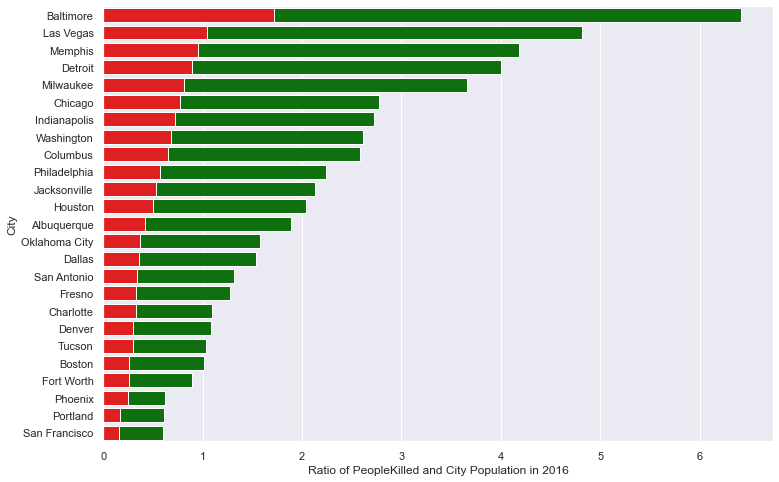

In [124]:
df['city_population'] = df['city_or_county'].apply(
    lambda x: int(population_in_2016[x]) if x in population_in_2016 else 0)

tempdf = df.groupby(by=['city_or_county']).agg({
    'n_killed': 'sum',
    'n_injured': 'sum',
    'city_population': 'mean',
    'state': 'count'
}).reset_index().rename(
    columns={
        'state': 'total_incidents',
        'n_killed': 'total_killed',
        'n_injured': 'total_injured'
    })
tempdf['incidents_population_ratio'] = 1000 * tempdf['total_incidents'] / (
    tempdf['city_population'] + 1)
tempdf['killed_population_ratio'] = 1000 * tempdf['total_killed'] / (
    tempdf['city_population'] + 1)
tempdf['injured_population_ratio'] = 1000 * tempdf['total_injured'] / (
    tempdf['city_population'] + 1)
tempdf['loss_population_ratio'] = 1000 * (tempdf['total_killed'] +
                                          tempdf['total_injured']) / (
                                              tempdf['city_population'] + 1)

i_p = tempdf.sort_values(['incidents_population_ratio'], ascending=[False])
i_p = i_p[i_p['city_population'] > 500000][:25]
sns.set(rc={'figure.figsize': (12, 8)})
ax = sns.barplot(y='city_or_county',
                 x='incidents_population_ratio',
                 data=i_p,
                 color='green')
ax.set(xlabel='GunViolence Incidents and CityPopulation in 2016',
       ylabel='City')

i_p = tempdf.sort_values(['killed_population_ratio'], ascending=[False])
i_p = i_p[i_p['city_population'] > 500000][:25]
sns.set(rc={'figure.figsize': (12, 8)})
ax = sns.barplot(y='city_or_county',
                 x='killed_population_ratio',
                 data=i_p,
                 color='red')
ax.set(xlabel='Ratio of PeopleKilled and City Population in 2016',
       ylabel='City');

Baltimore,Las Vegas and Memphis comes on the top for Ratio of People Killed and City Population in 2016

**Most Serious Gun Violence Incidents**

Hmmmm....now let's take a look at most serious incidents

In [125]:
df1 = df.sort_values(['violence'], ascending=[False])
df1[['date', 'state', 'city_or_county', 'address', 'n_killed', 'n_injured']].head(10)

,date,state,city_or_county,address,n_killed,n_injured
239677,2017-10-01,Nevada,Las Vegas,Mandalay Bay 3950 Blvd S,59,489
130448,2016-06-12,Florida,Orlando,1912 S Orange Avenue,50,53
67151,2017-11-05,Texas,Sutherland Springs,216 4th St,27,20
101531,2015-12-02,California,San Bernardino,1365 South Waterman Avenue,16,19
82745,2018-02-14,Florida,Pompano Beach (Parkland),5901 Pine Island Rd,17,17
70511,2015-05-17,Texas,Waco,4671 S Jack Kultgen Fwy,9,18
45845,2017-07-01,Arkansas,Little Rock,220 W 6th St,0,25
137328,2016-07-25,Florida,Fort Myers,3580 Evans Ave,2,19
11566,2014-04-02,Texas,Fort Hood,Motor Pool Road and Tank Destroyer Boulevard,4,16
92624,2015-10-01,Oregon,Roseburg,1140 Umpqua College Rd,10,9


we can conclude that in `Las Vegas,Orlando,Sutherland Springs has most number of deaths happend so far due to gun violence`

**incidents happend ploting on map**

**Here are the visuals for the the violence incident** 

<font color='green'>**violence is marked in green**</font>

In [126]:
map_df = df[df['n_killed'] >= 3][['latitude', 'longitude', 'violence', 'n_killed']].dropna()
map1 = folium.Map(location=[51.416852, -128.961881], tiles='CartoDB dark_matter', zoom_start=3)
map2 = folium.Map([51.416852, -128.961881], zoom_start=3.5, tiles='cartodbdark_matter')
markers = []
for i, row in map_df.iterrows():
    loss = row['violence']
    if row['violence'] > 100:
        loss = row['violence']*0.1    
    folium.CircleMarker([float(row['latitude']), float(row['longitude'])], radius=float(loss), color='green', fill=True).add_to(map1)

map1

**number of guns involved per incident**

In [127]:
df['n_guns'] = df['n_guns_involved'].apply(lambda x : "10+" if x>=10 else str(x))
# df['n_guns'].value_counts()
tempdf = df['n_guns'].value_counts().reset_index()
tempdf = tempdf[tempdf['index'] != 'nan']


labels = list(tempdf['index'])
values = list(tempdf['n_guns'])

fig = px.bar(y=labels,
             x=values,
             text=values,
             title='Number of guns used' )
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

`single gun is used the most during the gun violence`

**Incident characteristics per year**

Now,take a look at the incident characteristics for the violence throughout the dataset

In [128]:
from collections import Counter
big_text = "||".join(df['incident_characteristics'].dropna()).split("||")
incidents = Counter(big_text).most_common(20)
xx = [x[0] for x in incidents]
yy = [x[1] for x in incidents]

fig = px.bar(y=xx,
             x=yy,
             text=yy,
             title='Incident characteristics per year' )
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

`Participants are trying to make it violent by just leaving a person without killing them this means that they intentionally wants to create the violence`

In the USA around 17k incidents were of Drug involvement

**Age wise involvement**

**age wise involvement of participants**

In [129]:
def get_user_mapping(txt):
    if txt == "NA":
        return {}
    mapping = {}
    for d in txt.split("||"):
        try:
            key = d.split("::")[0]
            val = d.split("::")[1]
            if key not in mapping:
                mapping[key] = val
        except:
            pass
    return mapping

df['participant_type'] = df['participant_type'].fillna("NA")
df['participant_type_map'] = df['participant_type'].apply(lambda x : get_user_mapping(x))
df['participant_age'] = df['participant_age'].fillna("NA")
df['participant_age_map'] = df['participant_age'].apply(lambda x : get_user_mapping(x))
df['participant_gender'] = df['participant_gender'].fillna("NA")
df['participant_gender_map'] = df['participant_gender'].apply(lambda x : get_user_mapping(x))

## Finding the Suspect Age Groups
suspect_age_groups = {}
for i, row in df.iterrows():
    suspects = []
    for k,v in row['participant_type_map'].items():
        if "suspect" in v.lower():
            suspects.append(k)
    for suspect in suspects:
        if suspect in row['participant_age_map']:
            ag = row['participant_age_map'][suspect]
            if ag not in suspect_age_groups:
                suspect_age_groups[ag] = 0 
            else:
                suspect_age_groups[ag] += 1
                
age = pd.DataFrame(list(suspect_age_groups.items()),columns=['age','count'])
age.sort_values('count',inplace=True)

fig = px.bar(y='count',
             x='age',
             text='count',
             title='Age wise involvement of participants',
             data_frame=age[4:],
             color='count'
             )
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

Participants from the age group 18,19,20 till the age 25 are most involed in the violence this is the reason that there is a rise in lack of profitable employment.

**age wise involvement of victims**

In [130]:
victim_age_groups = {}
for i, row in df.iterrows():
    victims = []
    for k,v in row['participant_type_map'].items():
        if "victim" in v.lower():
            victims.append(k)
    for victim in victims:
        if victim in row['participant_age_map']:
            ag = row['participant_age_map'][victim]
            if ag not in victim_age_groups:
                victim_age_groups[ag] = 0 
            else:
                victim_age_groups[ag] += 1
                

age = pd.DataFrame(list(victim_age_groups.items()),columns=['age','count'])
age.sort_values('count',inplace=True)

fig = px.bar(y='count',
             x='age',
             text='count',
             title='Age wise involvement of victims',
             data_frame=age[4:],
             color='count'
             )
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()   

They are killing the same age group while the childrens below the age of 15 are getting killed.Also the newly born childs below the age of 5 are getting killed.

**Yearwise review of laws**

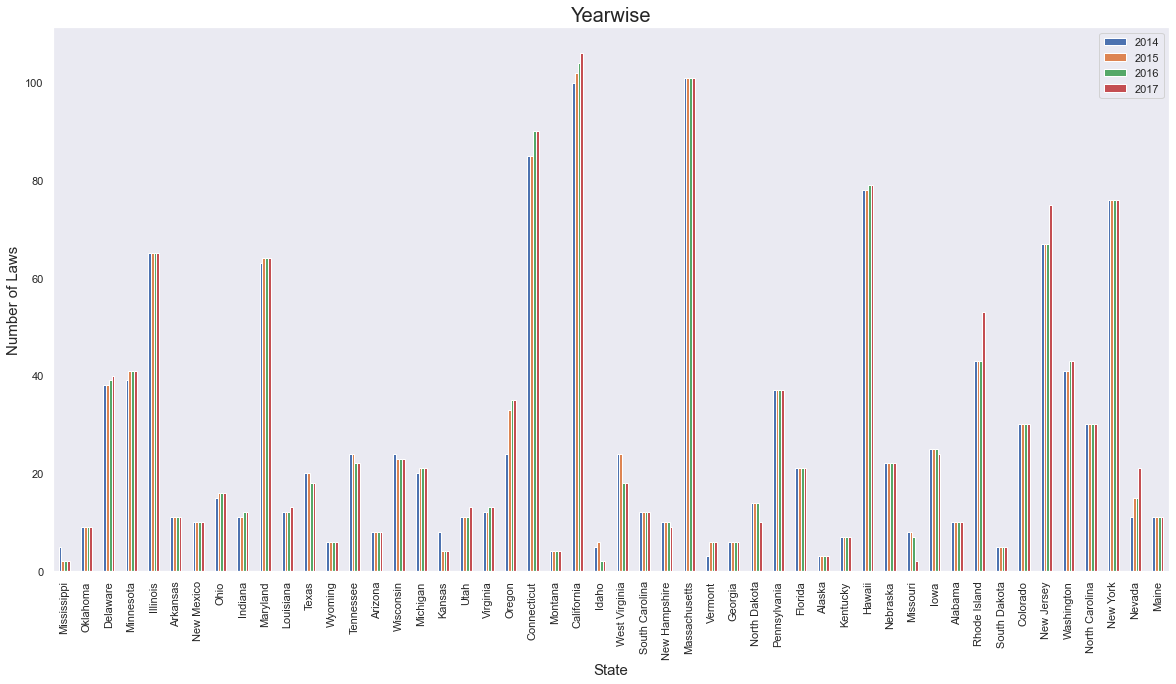

In [131]:
state_to_code = {'District of Columbia' : 'dc','Mississippi': 'MS', 'Oklahoma': 'OK', 'Delaware': 'DE', 'Minnesota': 'MN', 'Illinois': 'IL', 'Arkansas': 'AR', 'New Mexico': 'NM', 'Indiana': 'IN', 'Maryland': 'MD', 'Louisiana': 'LA', 'Idaho': 'ID', 'Wyoming': 'WY', 'Tennessee': 'TN', 'Arizona': 'AZ', 'Iowa': 'IA', 'Michigan': 'MI', 'Kansas': 'KS', 'Utah': 'UT', 'Virginia': 'VA', 'Oregon': 'OR', 'Connecticut': 'CT', 'Montana': 'MT', 'California': 'CA', 'Massachusetts': 'MA', 'West Virginia': 'WV', 'South Carolina': 'SC', 'New Hampshire': 'NH', 'Wisconsin': 'WI', 'Vermont': 'VT', 'Georgia': 'GA', 'North Dakota': 'ND', 'Pennsylvania': 'PA', 'Florida': 'FL', 'Alaska': 'AK', 'Kentucky': 'KY', 'Hawaii': 'HI', 'Nebraska': 'NE', 'Missouri': 'MO', 'Ohio': 'OH', 'Alabama': 'AL', 'Rhode Island': 'RI', 'South Dakota': 'SD', 'Colorado': 'CO', 'New Jersey': 'NJ', 'Washington': 'WA', 'North Carolina': 'NC', 'New York': 'NY', 'Texas': 'TX', 'Nevada': 'NV', 'Maine': 'ME'}
laws_2014 = {'Mississippi': 5, 'Oklahoma': 9, 'Delaware': 38, 'Minnesota': 39, 'Illinois': 65, 'Arkansas': 11, 'New Mexico': 10, 'Ohio': 15, 'Indiana': 11, 'Maryland': 63, 'Louisiana': 12, 'Texas': 20, 'Wyoming': 6, 'Tennessee': 24, 'Arizona': 8, 'Wisconsin': 24, 'Michigan': 20, 'Kansas': 8, 'Utah': 11, 'Virginia': 12, 'Oregon': 24, 'Connecticut': 85, 'Montana': 4, 'California': 100, 'Idaho': 5, 'West Virginia': 24, 'South Carolina': 12, 'New Hampshire': 10, 'Massachusetts': 101, 'Vermont': 3, 'Georgia': 6, 'North Dakota': 14, 'Pennsylvania': 37, 'Florida': 21, 'Alaska': 3, 'Kentucky': 7, 'Hawaii': 78, 'Nebraska': 22, 'Missouri': 8, 'Iowa': 25, 'Alabama': 10, 'Rhode Island': 43, 'South Dakota': 5, 'Colorado': 30, 'New Jersey': 67, 'Washington': 41, 'North Carolina': 30, 'New York': 76, 'Nevada': 11, 'Maine': 11}
laws_2015 = {'Mississippi': 2, 'Oklahoma': 9, 'Delaware': 38, 'Minnesota': 41, 'Illinois': 65, 'Arkansas': 11, 'New Mexico': 10, 'Ohio': 16, 'Indiana': 11, 'Maryland': 64, 'Louisiana': 12, 'Texas': 20, 'Wyoming': 6, 'Tennessee': 24, 'Arizona': 8, 'Wisconsin': 23, 'Michigan': 21, 'Kansas': 4, 'Utah': 11, 'Virginia': 12, 'Oregon': 33, 'Connecticut': 85, 'Montana': 4, 'California': 102, 'Idaho': 6, 'West Virginia': 24, 'South Carolina': 12, 'New Hampshire': 10, 'Massachusetts': 101, 'Vermont': 6, 'Georgia': 6, 'North Dakota': 14, 'Pennsylvania': 37, 'Florida': 21, 'Alaska': 3, 'Kentucky': 7, 'Hawaii': 78, 'Nebraska': 22, 'Missouri': 8, 'Iowa': 25, 'Alabama': 10, 'Rhode Island': 43, 'South Dakota': 5, 'Colorado': 30, 'New Jersey': 67, 'Washington': 41, 'North Carolina': 30, 'New York': 76, 'Nevada': 15, 'Maine': 11}
laws_2016 = {'Mississippi': 2, 'Oklahoma': 9, 'Delaware': 39, 'Minnesota': 41, 'Illinois': 65, 'Arkansas': 11, 'New Mexico': 10, 'Ohio': 16, 'Indiana': 12, 'Maryland': 64, 'Louisiana': 12, 'Texas': 18, 'Wyoming': 6, 'Tennessee': 22, 'Arizona': 8, 'Wisconsin': 23, 'Michigan': 21, 'Kansas': 4, 'Utah': 11, 'Virginia': 13, 'Oregon': 35, 'Connecticut': 90, 'Montana': 4, 'California': 104, 'Idaho': 2, 'West Virginia': 18, 'South Carolina': 12, 'New Hampshire': 10, 'Massachusetts': 101, 'Vermont': 6, 'Georgia': 6, 'North Dakota': 14, 'Pennsylvania': 37, 'Florida': 21, 'Alaska': 3, 'Kentucky': 7, 'Hawaii': 79, 'Nebraska': 22, 'Missouri': 7, 'Iowa': 25, 'Alabama': 10, 'Rhode Island': 43, 'South Dakota': 5, 'Colorado': 30, 'New Jersey': 67, 'Washington': 43, 'North Carolina': 30, 'New York': 76, 'Nevada': 15, 'Maine': 11}
laws_2017 = {'Mississippi': 2, 'Oklahoma': 9, 'Delaware': 40, 'Minnesota': 41, 'Illinois': 65, 'Arkansas': 11, 'New Mexico': 10, 'Ohio': 16, 'Indiana': 12, 'Maryland': 64, 'Louisiana': 13, 'Texas': 18, 'Wyoming': 6, 'Tennessee': 22, 'Arizona': 8, 'Wisconsin': 23, 'Michigan': 21, 'Kansas': 4, 'Utah': 13, 'Virginia': 13, 'Oregon': 35, 'Connecticut': 90, 'Montana': 4, 'California': 106, 'Idaho': 2, 'West Virginia': 18, 'South Carolina': 12, 'New Hampshire': 9, 'Massachusetts': 101, 'Vermont': 6, 'Georgia': 6, 'North Dakota': 10, 'Pennsylvania': 37, 'Florida': 21, 'Alaska': 3, 'Kentucky': 7, 'Hawaii': 79, 'Nebraska': 22, 'Missouri': 2, 'Iowa': 24, 'Alabama': 10, 'Rhode Island': 53, 'South Dakota': 5, 'Colorado': 30, 'New Jersey': 75, 'Washington': 43, 'North Carolina': 30, 'New York': 76, 'Nevada': 21, 'Maine': 11}

y1, y2, y3, y4 = [], [], [], []
x1 = []
for x, y in laws_2014.items():
    y1.append(y)
    y2.append(laws_2015[x])
    y3.append(laws_2016[x])
    y4.append(laws_2017[x])
    x1.append(x)
law = pd.DataFrame({'2014':y1,'2015':y2,'2016':y3,'2017':y4},index=x1)
law.plot(kind='bar',figsize=(20,10));
plt.grid(False)
plt.title('Yearwise' ,fontsize=20)
plt.xlabel('State',fontsize=15)
plt.ylabel('Number of Laws',fontsize=15);

Government is taking action towards those incidents in the California we can see that year wise there is growth in the laws.
Which is the proof of strictness in terms of security of the people

<hr>

Thank you so much for your time.

 Prominent Age of Gun Victims 

In [ ]:
victim_age_groups = {}
for i, row in df.iterrows():
    victims = []
    for k,v in row['participant_type_map'].items():
        if "victim" in v.lower():
            victims.append(k)
    for victim in victims:
        if victim in row['participant_age_map']:
            ag = row['participant_age_map'][victim]
            if ag not in victim_age_groups:
                victim_age_groups[ag] = 0 
            else:
                victim_age_groups[ag] += 1
                
trace1 = go.Bar(x=list(victim_age_groups.keys()), y=list(victim_age_groups.values()), opacity=0.75, name="month", marker=dict(color='brown'))
layout = dict(height=400, title='Victims Age - Distribution', xaxis=dict(range=[0, 100]), legend=dict(orientation="h"));
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)